In [4]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# MPC import
import numpy as np
from LinearMPC_3_1.MPCVelControl import MPCVelControl
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis, plot_static_states_inputs

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

#### Open-loop plots for starting stationary at 30° for roll.

Maximum invariant set successfully computed after 18 iterations.
Maximum invariant set successfully computed after 18 iterations.
Maximum invariant set successfully computed after 18 iterations.
Maximum invariant set successfully computed after 18 iterations.
Maximum invariant set successfully computed after 1 iterations.
Maximum invariant set successfully computed after 1 iterations.
Maximum invariant set successfully computed after 44 iterations.
Maximum invariant set successfully computed after 44 iterations.


AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=119, step=2), IntSlider(value=0…

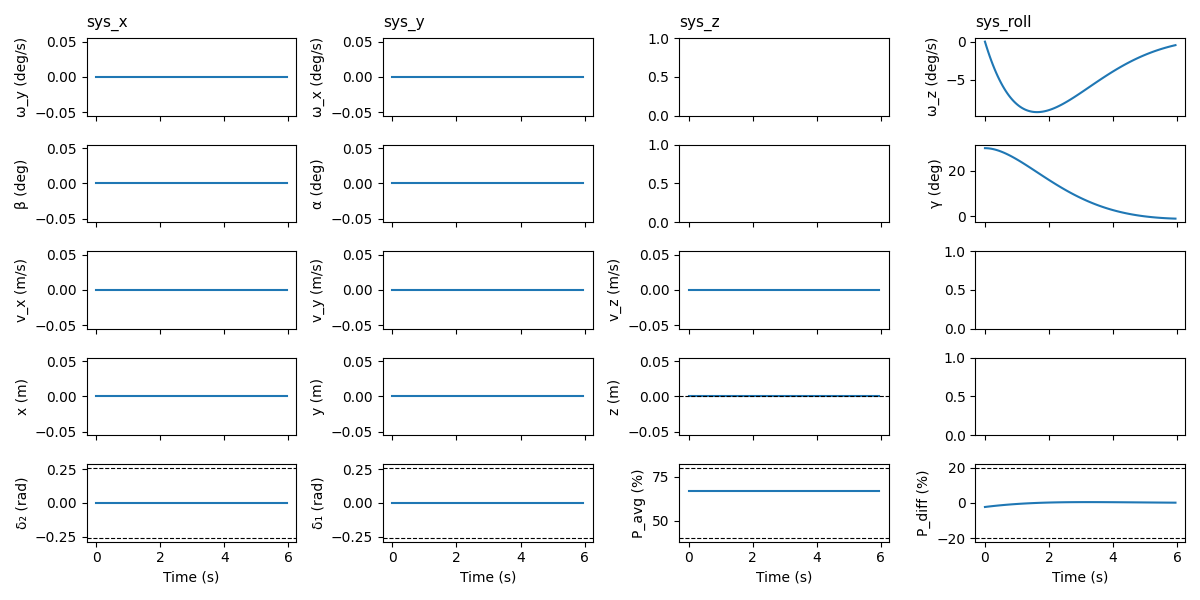

In [6]:
### Open-loop: 30 degrees roll

Ts = 0.05
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
H = 6 # MPC horizon in seconds
x0 = np.array([0, 0, 0, 0, 0, 30 * np.pi / 180, 0, 0, 0, 0, 0, 2.0])  # initial state

mpc = MPCVelControl().new_controller(rocket, Ts, H)
t0 = 0
u, x_ol, u_ol, t_ol, = mpc.get_u(t0, x0)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_ol[:-1], x_ol[:,:-1], u_ol);
plot_static_states_inputs(t_ol[:-1],x_ol[:,:-1],u_ol)

#### Open-loop plots for each dimension of the system starting at 5 m/s (for x, y and z)

In [7]:
from IPython.display import display
import ipywidgets as widgets
import numpy as np

### Open-loop: 5 m/s v
Ts = 0.05
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
H = 6

mpc = MPCVelControl().new_controller(rocket, Ts, H)  

x0_base = np.array([0,0,0,  0,0,0,  0,0,0,  0,0,2.0])
tests = {
    "x": np.array([5.0, 0.0, 0.0]),
    "y": np.array([0.0, 5.0, 0.0]),
    "z": np.array([0.0, 0.0, 5.0]),
}

t0 = 0

for name, v0 in tests.items():
    x0 = x0_base.copy()
    x0[6:9] = v0  # [v_x, v_y, v_z]

    u, x_ol, u_ol, t_ol = mpc.get_u(t0, x0)

    out = widgets.Output(layout={"border": "1px solid #ddd", "padding": "6px"})
    display(widgets.HTML(f"<b>Open-loop {name}</b>  v0={v0}"), out)

    with out:
        vis = RocketVis(rocket, rocket_obj_path)
        vis.anim_rate = 1.0
        vis.animate(t_ol[:-1], x_ol[:, :-1], u_ol)
        plot_static_states_inputs(t_ol[:-1],x_ol[:,:-1],u_ol)


Maximum invariant set successfully computed after 18 iterations.
Maximum invariant set successfully computed after 18 iterations.
Maximum invariant set successfully computed after 18 iterations.
Maximum invariant set successfully computed after 18 iterations.
Maximum invariant set successfully computed after 1 iterations.
Maximum invariant set successfully computed after 1 iterations.
Maximum invariant set successfully computed after 44 iterations.
Maximum invariant set successfully computed after 44 iterations.


HTML(value='<b>Open-loop x</b>  v0=[5. 0. 0.]')

Output(layout=Layout(border_bottom='1px solid #ddd', border_left='1px solid #ddd', border_right='1px solid #dd…

HTML(value='<b>Open-loop y</b>  v0=[0. 5. 0.]')

Output(layout=Layout(border_bottom='1px solid #ddd', border_left='1px solid #ddd', border_right='1px solid #dd…

HTML(value='<b>Open-loop z</b>  v0=[0. 0. 5.]')

Output(layout=Layout(border_bottom='1px solid #ddd', border_left='1px solid #ddd', border_right='1px solid #dd…

#### Invariant set of X subsystem

setting up xvel


/opt/miniconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(


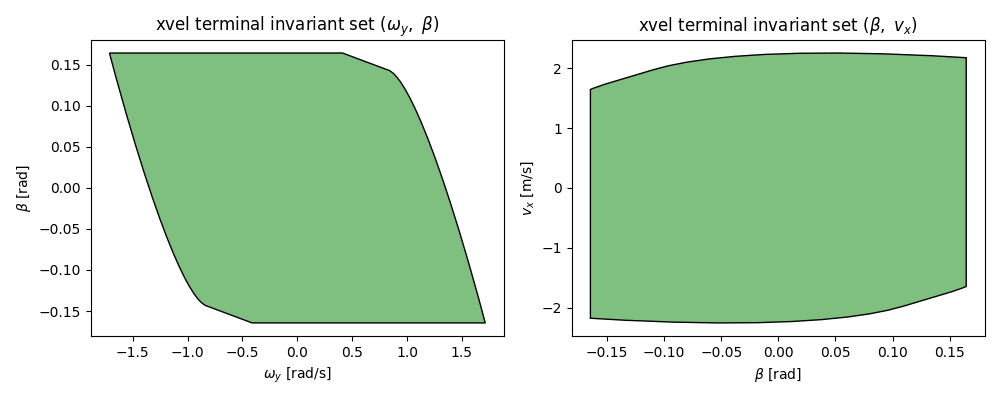

In [8]:
### invariant set plot

from LinearMPC.MPCControl_xvel import MPCControl_xvel
xs, us = rocket.trim()
A, B = rocket.linearize(xs, us)
mpc_x = MPCControl_xvel(A, B, xs, us, Ts, H) # Full 12x12 A and 12x4 B matrices
# omega_y, beta, v_x
x0 = np.array([0, 0, 0])
u0, x_traj, u_traj = mpc_x.get_u(x0) # x and u for single subsystem

import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# (omega_y, beta)
mpc_x.O_inf.projection(dims=(0, 1)).plot(
    ax=ax1, color='g', opacity=0.5, show_vertices=False
)
ax1.set_title(r"xvel terminal invariant set $(\omega_y,\ \beta)$")
ax1.set_xlabel(r"$\omega_y$ [rad/s]")
ax1.set_ylabel(r"$\beta$ [rad]")
ax1.set_aspect("auto")

# (beta, v_x)
mpc_x.O_inf.projection(dims=(1, 2)).plot(
    ax=ax2, color='g', opacity=0.5, show_vertices=False
)
ax2.set_title(r"xvel terminal invariant set $(\beta,\ v_x)$")
ax2.set_xlabel(r"$\beta$ [rad]")
ax2.set_ylabel(r"$v_x$ [m/s]")
ax2.set_aspect("auto")

plt.tight_layout()
plt.show()




#### Invariant set of Y subsystem

setting up yvel


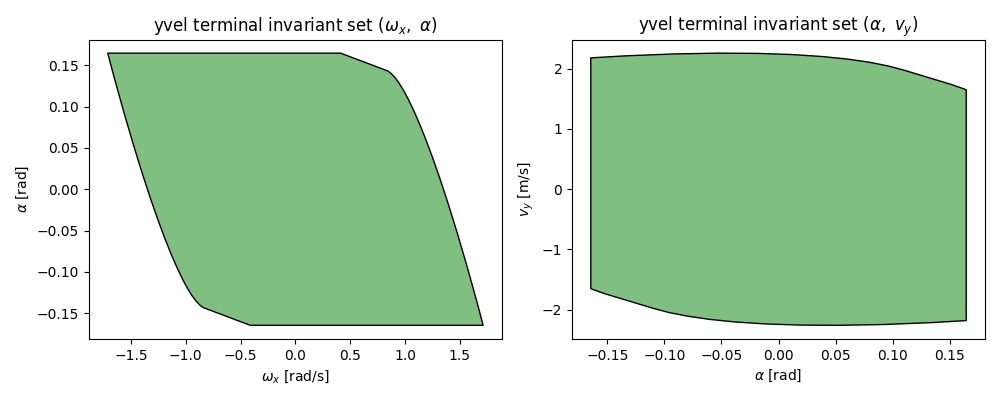

In [9]:
from LinearMPC.MPCControl_yvel import MPCControl_yvel
xs, us = rocket.trim()
A, B = rocket.linearize(xs, us)
mpc_y = MPCControl_yvel(A, B, xs, us, Ts, H) # Full 12x12 A and 12x4 B matrices
y0 = np.array([0, 0, 0])
u0, y_traj, u_traj = mpc_y.get_u(y0) # x and u for single subsystem
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# (omega_x, alpha)
mpc_y.O_inf.projection(dims=(0, 1)).plot(
    ax=ax1, color='g', opacity=0.5, show_vertices=False
)
ax1.set_title(r"yvel terminal invariant set $(\omega_x,\ \alpha)$")
ax1.set_xlabel(r"$\omega_x$ [rad/s]")
ax1.set_ylabel(r"$\alpha$ [rad]")
ax1.set_aspect("auto")

# (alpha, v_y)
mpc_y.O_inf.projection(dims=(1, 2)).plot(
    ax=ax2, color='g', opacity=0.5, show_vertices=False
)
ax2.set_title(r"yvel terminal invariant set $(\alpha,\ v_y)$")
ax2.set_xlabel(r"$\alpha$ [rad]")
ax2.set_ylabel(r"$v_y$ [m/s]")
ax2.set_aspect("auto")

plt.tight_layout()
plt.show()



#### Invariant set of Z subsystem

setting up zvel


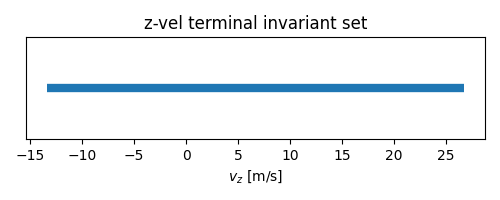

In [10]:
from LinearMPC.MPCControl_zvel import MPCControl_zvel
import numpy as np
import matplotlib.pyplot as plt

xs, us = rocket.trim()
A, B = rocket.linearize(xs, us)

mpc_z = MPCControl_zvel(A, B, xs, us, Ts, H)

# z 子系统状态是 [v_z]（1维）
x0 = np.array([0.0])

# 这一步会求解一次 OCP，同时在 get_u 里（你的实现）会更新/计算 mpc_z.O_inf
u0, x_traj, u_traj = mpc_z.get_u(x0)


# 如果 plot() 不支持 1D，可以这样画端点区间
mpc_z.O_inf.minVrep(True)
V = mpc_z.O_inf.V        
vz_min = V[:, 0].min()
vz_max = V[:, 0].max()

fig, ax = plt.subplots(1, 1, figsize=(5, 2))
ax.hlines(0, vz_min, vz_max, linewidth=6)
ax.set_title("z-vel terminal invariant set")
ax.set_xlabel(r"$v_z$ [m/s]")
ax.set_yticks([])
plt.tight_layout()
plt.show()



#### Invariant set of Roll subsystem

setting up roll


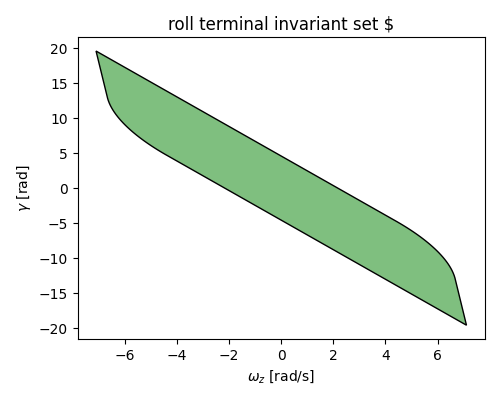

In [11]:
from LinearMPC.MPCControl_roll import MPCControl_roll
import numpy as np
import matplotlib.pyplot as plt

xs, us = rocket.trim()
A, B = rocket.linearize(xs, us)

mpc_r = MPCControl_roll(A, B, xs, us, Ts, H)

# roll 子系统状态是 [omega_z, gamma]（2维）
x0 = np.array([0.0, 0.0])

u0, x_traj, u_traj = mpc_r.get_u(x0)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))

mpc_r.O_inf.plot(ax=ax, color='g', opacity=0.5, show_vertices=False)

ax.set_title("roll terminal invariant set $")
ax.set_xlabel(r"$\omega_z$ [rad/s]")
ax.set_ylabel(r"$\gamma$ [rad]")
ax.set_aspect("auto")
plt.tight_layout()
plt.show()


#### Close-loop plots for starting stationary at 30° for roll.

Maximum invariant set successfully computed after 18 iterations.
Maximum invariant set successfully computed after 18 iterations.
Maximum invariant set successfully computed after 18 iterations.
Maximum invariant set successfully computed after 18 iterations.
Maximum invariant set successfully computed after 1 iterations.
Maximum invariant set successfully computed after 1 iterations.
Maximum invariant set successfully computed after 44 iterations.
Maximum invariant set successfully computed after 44 iterations.
Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=139, step=2), IntSlider(value=0…

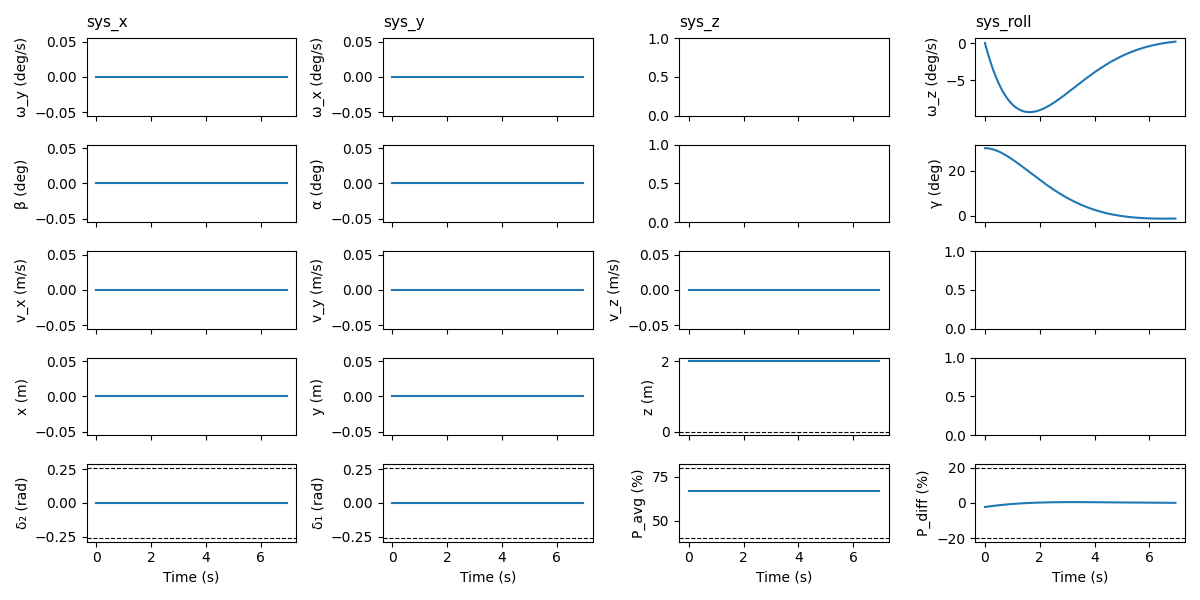

In [12]:
### Close-loop: 30 degrees roll

Ts = 0.05
sim_time = 7
H = 5
# [[w_x, w_y, w_z], [alpha, beta, gamma], [v_x, v_y, v_z], [x,y,z]]
x0 = np.array([0, 0, 0, 0, 0, 30 * np.pi / 180, 0, 0, 0, 0, 0, 2.0])  # initial state

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, method="linear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl, T_ol=t_ol[..., :-1], X_ol=x_ol, U_ol=u_ol);
plot_static_states_inputs(t_cl[:-1],x_cl[:,:-1],u_cl)


#### Close-loop plots for each dimension of the system starting at 5 m/s (for x, y and z)

In [13]:
from IPython.display import display
import ipywidgets as widgets
import numpy as np

### Close-loop: 5 m/s v (separate x / y / z)

Ts = 0.05
sim_time = 7
H = 5

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

# [[w_x, w_y, w_z], [alpha, beta, gamma], [v_x, v_y, v_z], [x,y,z]]
x0_base = np.array([0,0,0,  0,0,0,  0,0,0,  0,0,2.0])  # keep z=2m like before
tests = {
    "x": np.array([5.0, 0.0, 0.0]),
    "y": np.array([0.0, 5.0, 0.0]),
    "z": np.array([0.0, 0.0, 5.0]),
}

for name, v0 in tests.items():
    x0 = x0_base.copy()
    x0[6:9] = v0

    t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
        mpc, sim_time, H, x0, method="linear"
    )

    out = widgets.Output(layout={"border": "1px solid #ddd", "padding": "6px"})
    display(widgets.HTML(f"<b>Closed-loop {name}</b>  v0={v0}"), out)

    with out:
        vis = RocketVis(rocket, rocket_obj_path)
        vis.anim_rate = 1.0
        vis.animate(
            t_cl[:-1], x_cl[:, :-1], u_cl,
            T_ol=t_ol[..., :-1], X_ol=x_ol, U_ol=u_ol
        )
        plot_static_states_inputs(t_cl[:-1],x_cl[:,:-1],u_cl)
    


Maximum invariant set successfully computed after 18 iterations.
Maximum invariant set successfully computed after 18 iterations.
Maximum invariant set successfully computed after 18 iterations.
Maximum invariant set successfully computed after 18 iterations.
Maximum invariant set successfully computed after 1 iterations.
Maximum invariant set successfully computed after 1 iterations.
Maximum invariant set successfully computed after 44 iterations.
Maximum invariant set successfully computed after 44 iterations.
Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 

/opt/miniconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(



 State beta violation: -0.17 < -0.17, 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time 1.30: 
Simulating time 1.35: 
Simulating time 1.40: 
Simulating time 1.45: 
Simulating time 1.50: 
Simulating time 1.55: 
Simulating time 1.60: 
Simulating time 1.65: 
Simulating time 1.70: 
Simulating time 1.75: 
Simulating time 1.80: 
Simulating time 1.85: 
Simulating time 1.90: 
Simulating time 1.95: 
Simulating time 2.00: 
Simulating time 2.05: 
Simulating time 2.10: 
Simulating time 2.15: 
Simulating time 2.20: 
Simulating time 2.25: 
Simulating time 2.30: 
Simulating time 2.35: 
Simulating time 2

HTML(value='<b>Closed-loop x</b>  v0=[5. 0. 0.]')

Output(layout=Layout(border_bottom='1px solid #ddd', border_left='1px solid #ddd', border_right='1px solid #dd…

Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
 State alpha violation: 0.17 > 0.17, 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time 1.30: 
Simulating time 1.35: 
Simulating time 1.40: 
Simulating time 1.45: 
Simulating time 1.50: 
Simulating time 1.55: 
Simulating time 1.60: 
Simulating time 1.65: 
Simulating time 1.70: 
Simulating time 1.75: 
Simulating time 1.80: 
Simulating time 1.85: 
Simulating time 1.90: 
Simulating time 1.95: 
Simulating time 2.00: 
Simulating time 2.0

HTML(value='<b>Closed-loop y</b>  v0=[0. 5. 0.]')

Output(layout=Layout(border_bottom='1px solid #ddd', border_left='1px solid #ddd', border_right='1px solid #dd…

Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time 1.30: 
Simulating time 1.35: 
Simulating time 1.40: 
Simulating time 1.45: 
Simulating time 1.50: 
Simulating time 1.55: 
Simulating time 1.60: 
Simulating time 1.65: 
Simulating time 1.70: 
Simulating time 1.75: 
Simulating time 1.80: 
Simulating time 1.85: 
Simulating time 1.90: 
Simulating time 1.95: 
Simulating time 2.00: 
Simulating time 2.05: 
Simulating time 2.10: 
Simulating 

HTML(value='<b>Closed-loop z</b>  v0=[0. 0. 5.]')

Output(layout=Layout(border_bottom='1px solid #ddd', border_left='1px solid #ddd', border_right='1px solid #dd…